# Part I - Video Game Sales Data
## by Diego França

## Introduction
> The data set chosen to be analyse was: Video Game Sales - Analyze sales data from more than 16,500 games. The data set is related to sales of video games and where extacted from https://www.kaggle.com/datasets/gregorut/videogamesales. 
 


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
games = pd.read_csv('vgsales.csv')

In [3]:
games = games.dropna() #So all lines are free off null values
print(games.shape)
print(games.dtypes)
games.head(10)

(16291, 11)
Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [4]:
games.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


### What is the structure of your dataset?

It compose sales data from more than 16,500 games.

Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.

### What is/are the main feature(s) of interest in your dataset?

> I'm most intestesd in understand which features are best to predict a higher sale of a video games.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect to see some differences between the NA and JP region that can conflict making not one but some games to have higher amout of sells with difference features. The plataform probably will be other feature. 

In [5]:
default_color = sb.color_palette()[0] #To create a default color to all plots

## Univariate Exploration

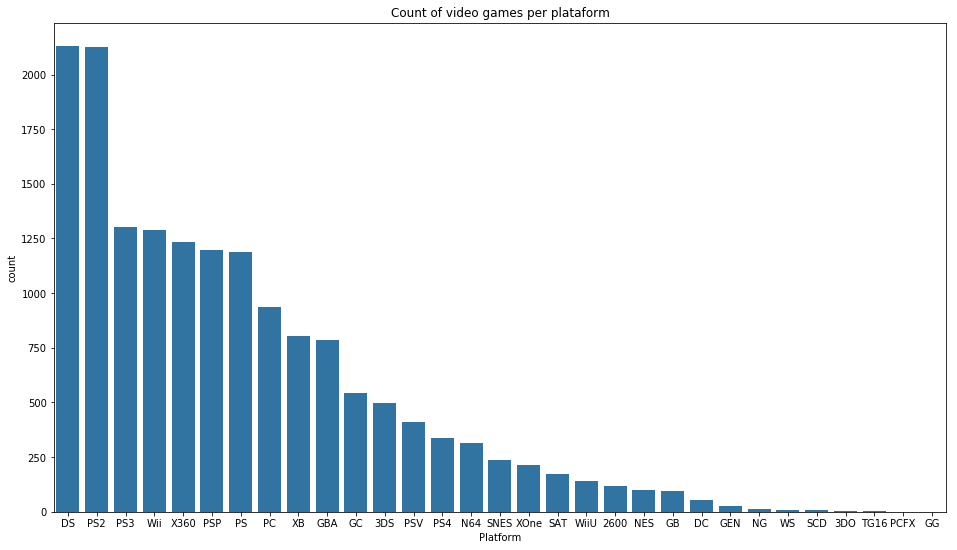

In [6]:
#At first, I'll begin analysing the distribution of the feature Platform. Which Platform are the most popular?

plt.figure(figsize = [16, 9])#Setting plot size

#In order to have a chart ordered
freq = games['Platform'].value_counts()  #List off platform by most frequent
plt_order = freq.index #Getting the index of the list

sb.countplot(data = games, x = 'Platform', color = default_color, order = plt_order)
plt.title('Count of video games per plataform');

From the chart we can see that DS and PS2 are straight together followed by PS3, Wii, X360.  

In [7]:
#Just to see on a list the years and the count off releases by year.
year_count = games['Year'].value_counts()
year_count

2009.0    1431
2008.0    1428
2010.0    1257
2007.0    1201
2011.0    1136
2006.0    1008
2005.0     936
2002.0     829
2003.0     775
2004.0     744
2012.0     655
2015.0     614
2014.0     580
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     342
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1983.0      17
1989.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

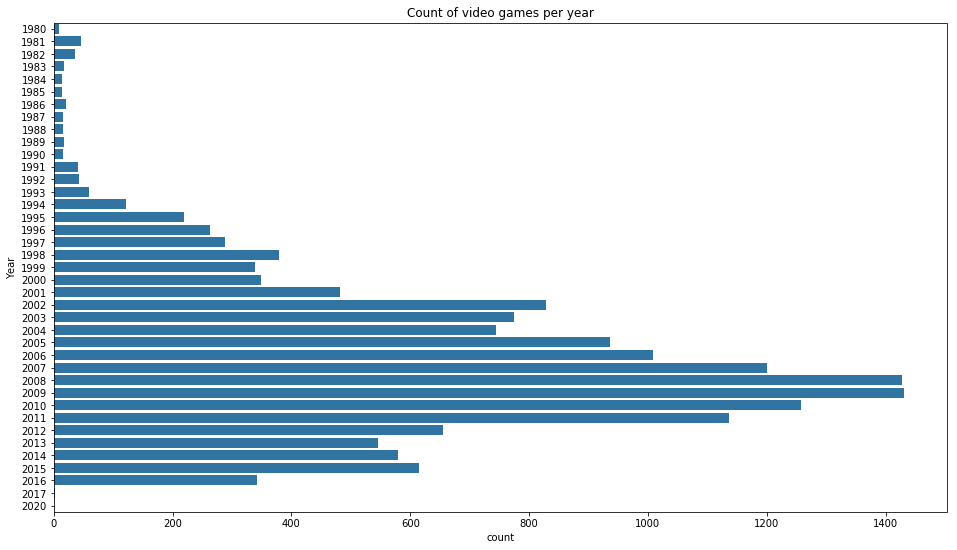

In [8]:
#Let's see how the Year are distribute on the data set, trying to answered which year had more relases?
games['Year'] = games['Year'].astype(int) #Converting into int

plt.figure(figsize = [16, 9]) #Setting plot size

sb.countplot(data = games, y = 'Year', color = default_color)
plt.title('Count of video games per year');

From this chart, it's clear that the most part of the video games were created on the 2000's with 2009 being the higher year. Other fact is that from 1980 to 1990, the higher year were the 1981. 

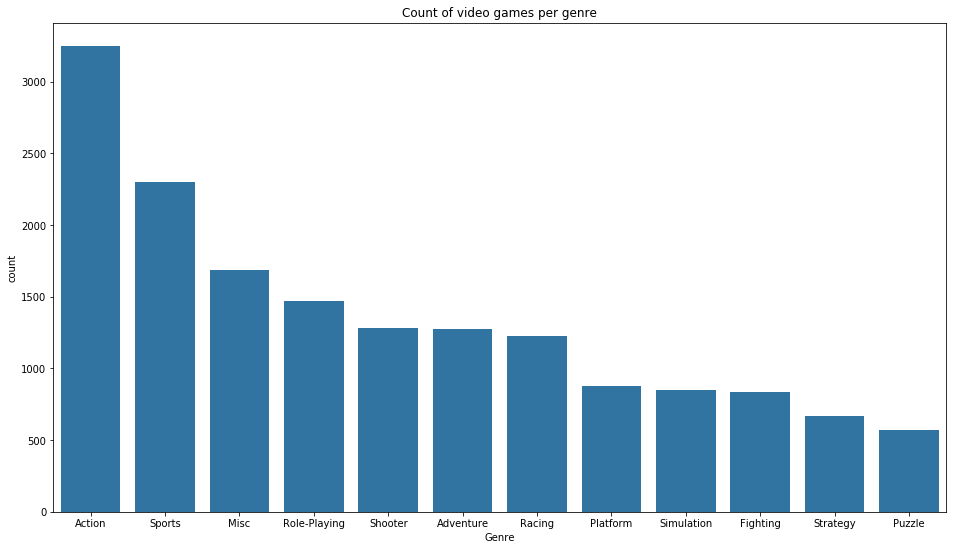

In [9]:
#What about the Genre, let's see how it is. Which genre are the most popular? 

#To order by the most frequente genre
freq = games['Genre'].value_counts() #List off genrer by most frequent
gnr_order = freq.index #Getting the index of the list

plt.figure(figsize=[16, 9]) #Setting the size

sb.countplot(data = games, x = 'Genre', color = default_color, order = gnr_order)
plt.xlabel('Genre')
plt.title('Count of video games per genre'); 
plt.show()

The Genre with the higher amount of video games are action, followed by the sport.The least one are Puzzle.

In [10]:
#Let's see how the percentege are distribute.
gnr_counts = games['Genre'].value_counts() #Data set diveded by genre
gnr_counts

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

In [11]:
gnr_total_counts = games['Genre'].value_counts().sum() #Sum of lines in the data set with genre
gnr_total_counts

16291

In [12]:
max_gnr_count = gnr_counts[0] #Taking the higher number of the list created before. 
max_gnr_count

3251

In [13]:
max_prop = max_gnr_count / gnr_total_counts #Performing the maximun proportions by doing higher number divede by total count
max_prop

0.19955803818059051

In [14]:
tick_props = np.arange(0, max_prop, 0.01) #Creating a array with the proportion size until the max proportion
tick_props

array([ 0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,
        0.09,  0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,
        0.18,  0.19])

In [15]:
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names

['0.00',
 '0.01',
 '0.02',
 '0.03',
 '0.04',
 '0.05',
 '0.06',
 '0.07',
 '0.08',
 '0.09',
 '0.10',
 '0.11',
 '0.12',
 '0.13',
 '0.14',
 '0.15',
 '0.16',
 '0.17',
 '0.18',
 '0.19']

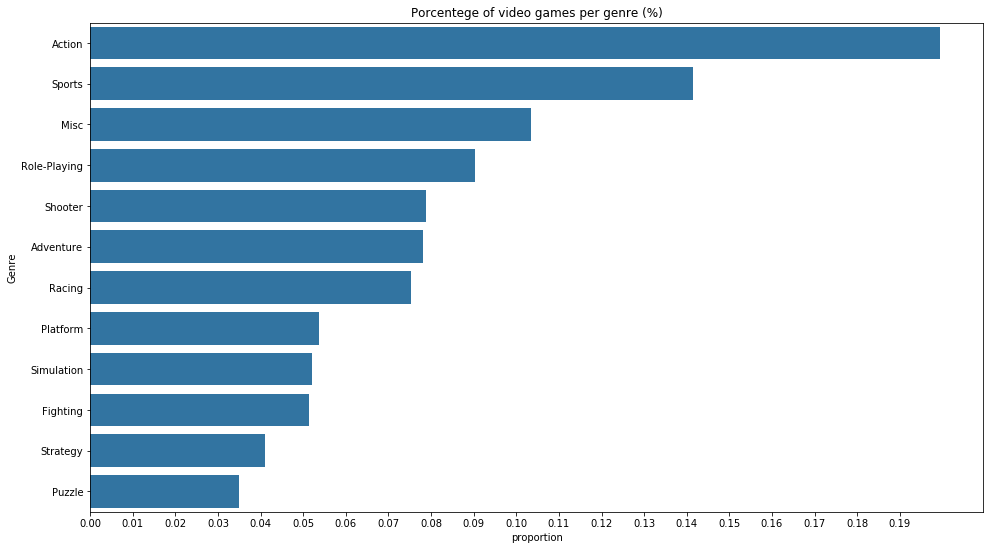

In [17]:
plt.figure(figsize=[16, 9])#Setting plot size

sb.countplot(data=games, y='Genre', color=default_color, order=gnr_order);
plt.xticks(tick_props * gnr_total_counts, tick_names)#Genereting new axis with proportion sizes 
plt.xlabel('proportion');
plt.title('Porcentege of video games per genre (%)');

Although the Action are the most genrer, it represents aproximatly 20% of all data set. 

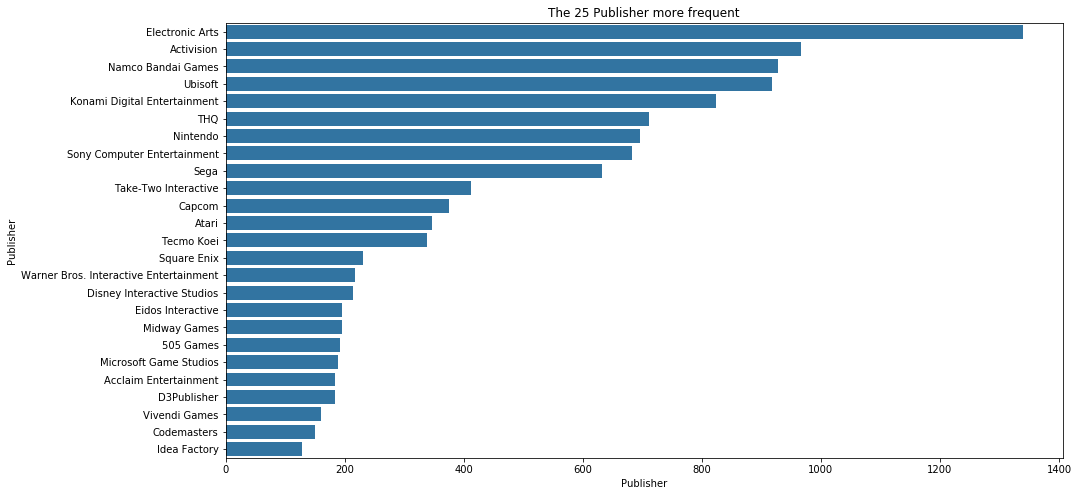

In [18]:
#Plotting the Publisher feature to answer wich publisher are more popular.
freq = games['Publisher'].value_counts()#List off genrer by most frequent
publ_order = freq.iloc[:25].index #Getting the index of the list

plt.figure(figsize=[15, 8])#Setting plot size

sb.countplot(data = games, y = 'Publisher', color = default_color, order = publ_order)
plt.xlabel('Publisher')
plt.title('The 25 Publisher more frequent');
plt.show()

Electronic Arts are the most frequent publisher on this data set.

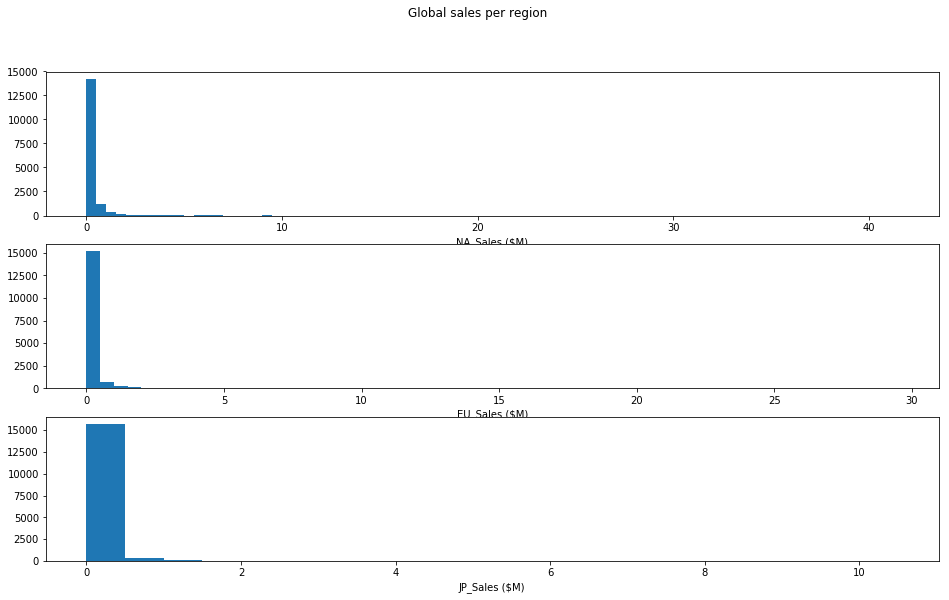

In [19]:
fig, ax = plt.subplots(nrows=3, figsize = [16, 9])#Setting number of plots rows and plot size

plt.suptitle("Global sales per region");#Setting title to all plots

variables = ['NA_Sales', 'EU_Sales', 'JP_Sales']#Setting the variables to use on loop
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(games[var]), max(games[var])+0.5, 0.5)#Setting bins sizes according to the min and max variable values
    ax[i].hist(data = games, x = var, bins = bins)
    ax[i].set_xlabel('{} ($M)'.format(var))

plt.show()

    From this plot, we can see some outliers on all regions. Those outliers are the most sold games on the data set. But before separate those outliers, let's try to convert to a log scale and see if its possible see something. 

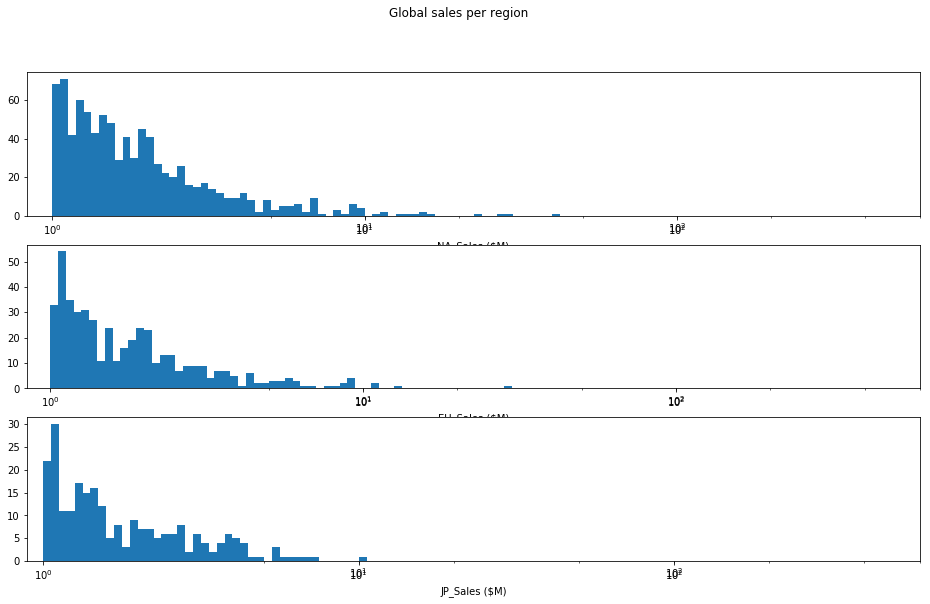

In [20]:
fig, ax = plt.subplots(nrows=3, figsize = [16, 9])#Setting number of plots rows and plot size

plt.suptitle("Global sales per region");#Setting title to all plots

variables = ['NA_Sales', 'EU_Sales', 'JP_Sales']#Setting the variables to use on loop
for i in range(len(variables)):
    var = variables[i]
    log_binsize = 0.025
    bins = 10 ** np.arange(0, np.log10(max(games[var]))+log_binsize, log_binsize)#Setting bins sizes according to the min and max variable values applying log scale transformation
    ax[i].hist(data = games, x = var, bins = bins)
    ax[i].set_xscale('log')#Actually transform into log scale
    ax[i].set_xticks([5, 10, 2e1, 5e1, 1e2, 2e2, 4e2, 6e2], ['500k', '1M', '2M', '5M', '10M', '20M', '40M', '60M'])#changing the xticks to better visualize
    ax[i].set_xlabel('{} ($M)'.format(var))

plt.show()

It still to early to see some results, so lets analyse just the outliers, as are those that we are most interst of.

In [21]:
outliers = ((games['NA_Sales'] > 5) | (games['EU_Sales'] > 3) | (games['JP_Sales'] > 3))#Filtering the data set with outliers parameters
print(outliers.sum())#Number of outliers
print(games.loc[outliers,:])#The outliers

108
     Rank                                            Name Platform  Year  \
0       1                                      Wii Sports      Wii  2006   
1       2                               Super Mario Bros.      NES  1985   
2       3                                  Mario Kart Wii      Wii  2008   
3       4                               Wii Sports Resort      Wii  2009   
4       5                        Pokemon Red/Pokemon Blue       GB  1996   
5       6                                          Tetris       GB  1989   
6       7                           New Super Mario Bros.       DS  2006   
7       8                                        Wii Play      Wii  2006   
8       9                       New Super Mario Bros. Wii      Wii  2009   
9      10                                       Duck Hunt      NES  1984   
10     11                                      Nintendogs       DS  2005   
11     12                                   Mario Kart DS       DS  2005   
12     1

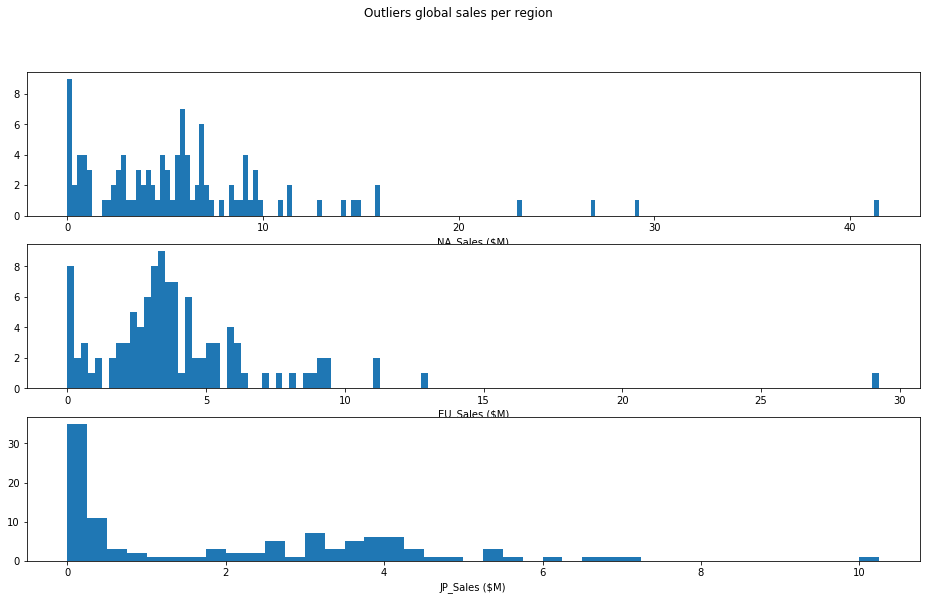

In [22]:
fig, ax = plt.subplots(nrows=3, figsize = [16, 9])#Setting number of plots rows and plot size

plt.suptitle("Outliers global sales per region");#Setting title to all plots

variables = ['NA_Sales', 'EU_Sales', 'JP_Sales']#Setting the variables to use on loop
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(games[var]), max(games[var])+0.25, 0.25)
    ax[i].hist(data = games.loc[outliers,:], x = var, bins = bins)#Applying the filter on the data parameter
    ax[i].set_xlabel('{} ($M)'.format(var))
    
plt.show();


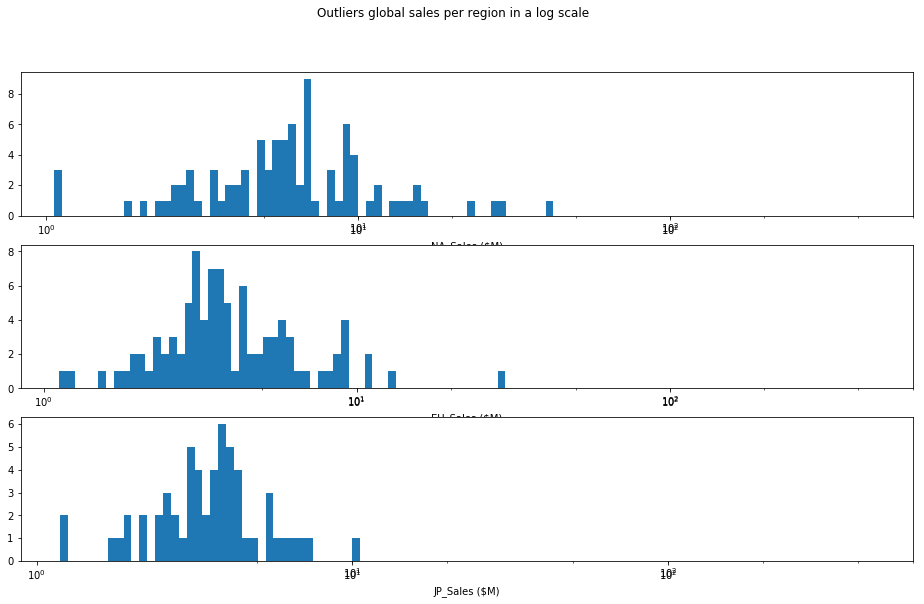

In [23]:
fig, ax = plt.subplots(nrows=3, figsize = [16, 9])#Setting number of plots rows and plot size

plt.suptitle("Outliers global sales per region in a log scale");#Setting title to all plots

variables = ['NA_Sales', 'EU_Sales', 'JP_Sales']#Setting the variables to use on loop
for i in range(len(variables)):
    var = variables[i]
    log_binsize = 0.025
    bins = 10 ** np.arange(0, np.log10(max(games[var]))+log_binsize, log_binsize)
    ax[i].hist(data = games.loc[outliers,:], x = var, bins = bins)
    ax[i].set_xscale('log')
    ax[i].set_xticks([5, 10, 2e1, 5e1, 1e2, 2e2, 4e2, 6e2], ['500k', '1M', '2M', '5M', '10M', '20M', '40M', '60M'])
    ax[i].set_xlabel('{} ($M)'.format(var))
plt.show()

With the log scale it is possible to better see the distribution. On North America plot we can see that between 500k and 1M are the most concentrate video games. A similar analyse can be made on Europe and Japan.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Until now it was possible to see that DS and PS2 are the most popular platform, the 2000's were the period of most releases, Action is the genrer most frequent on the data set with almost 20% of apperence and last but not least, Electronic Arts are the publusher more frequent. 

> To discover the distribution of the sales on the regions were necessery to use a log scale transformation. With this transformation it was possible to see.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> At the beginning it was necessary to drop all null rows to transform the year collumn into a integer collumn. 

## Bivariate Exploration

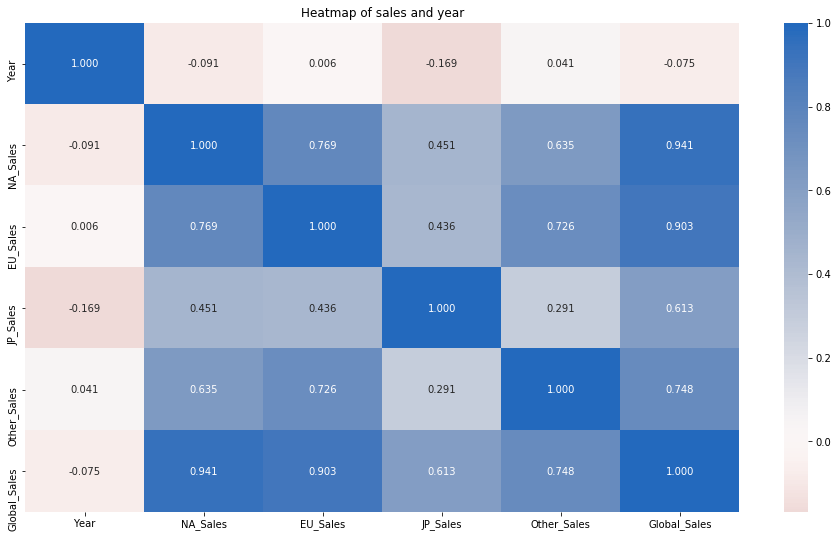

In [24]:
#Plotting pairwise between the region sales.
numeric = ['Year','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']#Setting a array with the collumn name of numeric variable

plt.figure(figsize = [16, 9])#Setting the plot size

#Plotting a heatmap with numeric collumns
sb.heatmap(games[numeric].corr(), annot = True, fmt = '.3f',
            cmap = 'vlag_r', center = 0)

plt.title('Heatmap of sales and year');
plt.show()


From this plot we should expect corelation between NA_Sales and Global_Sales, suggesting perhaps percetage of NA_Sales represent a big portion of the global sales. Following the same perspective, Europe region also represent a good part of global sales. And both sould represet more than the other regions including Japan. 

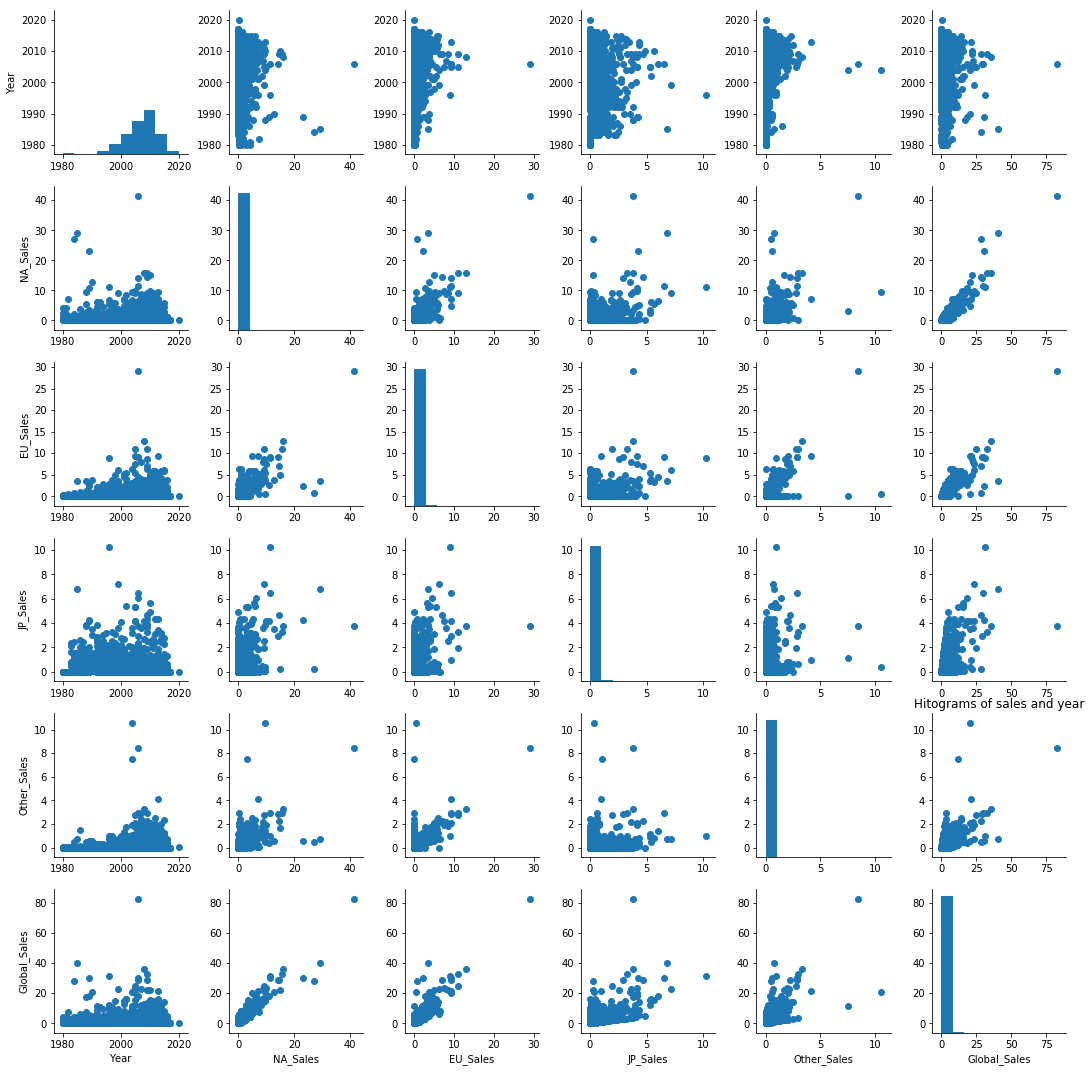

In [25]:
g = sb.PairGrid(data = games, vars = numeric)
g = g.map_diag(plt.hist);
g.map_offdiag(plt.scatter); #Plot a scatter between numeric variable
plt.title('Hitograms of sales and year');

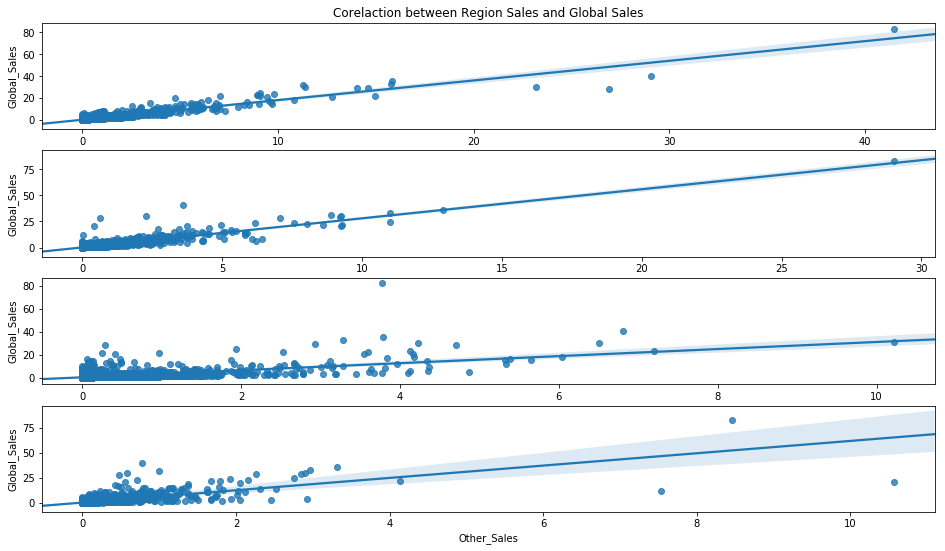

In [28]:
plt.figure(figsize = [16, 9])#Setting plot size
plt.subplot(4, 1, 1)#Setting the plot position
sb.regplot(games['NA_Sales'], games['Global_Sales']);#Ploting with regresion between NA sales and Global Sales
plt.title('Corelaction between Region Sales and Global Sales');
plt.subplot(4, 1, 2)#Setting the plot position
sb.regplot(games['EU_Sales'], games['Global_Sales']);#Ploting with regresion between EU sales and Global Sales
plt.subplot(4, 1, 3)#Setting the plot position
sb.regplot(games['JP_Sales'], games['Global_Sales']);#Ploting with regresion between JP sales and Global Sales
plt.subplot(4, 1, 4)#Setting the plot position
sb.regplot(games['Other_Sales'], games['Global_Sales']);#Ploting with regresion between Orther sales and Global Sales


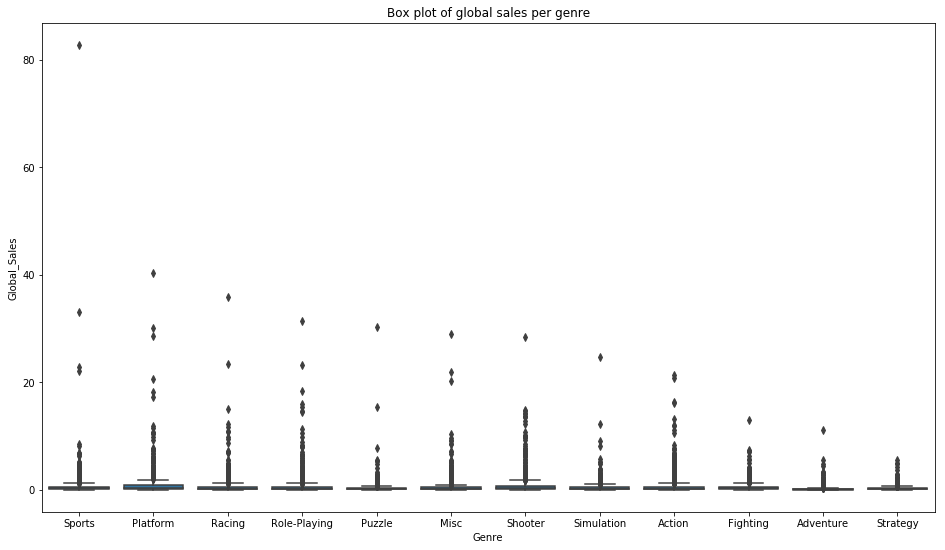

In [30]:
plt.figure(figsize=[16, 9])#Setting plot size

sb.boxplot(data=games, x='Genre', y='Global_Sales', color=default_color);#Plotting a boxplot with Genre and Global sales
plt.title('Box plot of global sales per genre');

In [31]:
outliers_global_genre = (games['Global_Sales'] > 10)#Filtering dataset with global sales greather then 10 milion 
print(outliers_global_genre.sum())#How many in this filter
print(games.loc[outliers_global_genre,:])#Wich ones on this filter

62
    Rank                                          Name Platform  Year  \
0      1                                    Wii Sports      Wii  2006   
1      2                             Super Mario Bros.      NES  1985   
2      3                                Mario Kart Wii      Wii  2008   
3      4                             Wii Sports Resort      Wii  2009   
4      5                      Pokemon Red/Pokemon Blue       GB  1996   
5      6                                        Tetris       GB  1989   
6      7                         New Super Mario Bros.       DS  2006   
7      8                                      Wii Play      Wii  2006   
8      9                     New Super Mario Bros. Wii      Wii  2009   
9     10                                     Duck Hunt      NES  1984   
10    11                                    Nintendogs       DS  2005   
11    12                                 Mario Kart DS       DS  2005   
12    13                   Pokemon Gold/Pokemon 

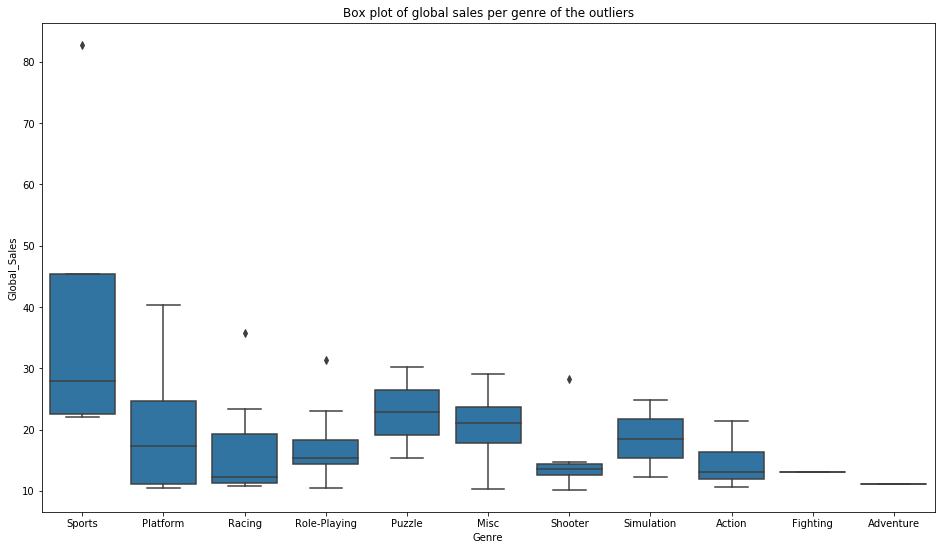

In [32]:
plt.figure(figsize=[16, 9])#Setting plot size

sb.boxplot(data=games.loc[outliers_global_genre,:], x='Genre', y='Global_Sales', color=default_color);#Plotting a boxplot with Genre and Global sales 
#but with filter on data parameter
plt.title('Box plot of global sales per genre of the outliers');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Here we could obeserve a corelaction between the regions sales and global sales. In particular, Europa and North America are more related to the global sales then the Japan region.

> Also it was possibel to see higher global sale per genre and with this observation we can say that Sports are the genre with the video game with higher sale. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> No other feature were observed here.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

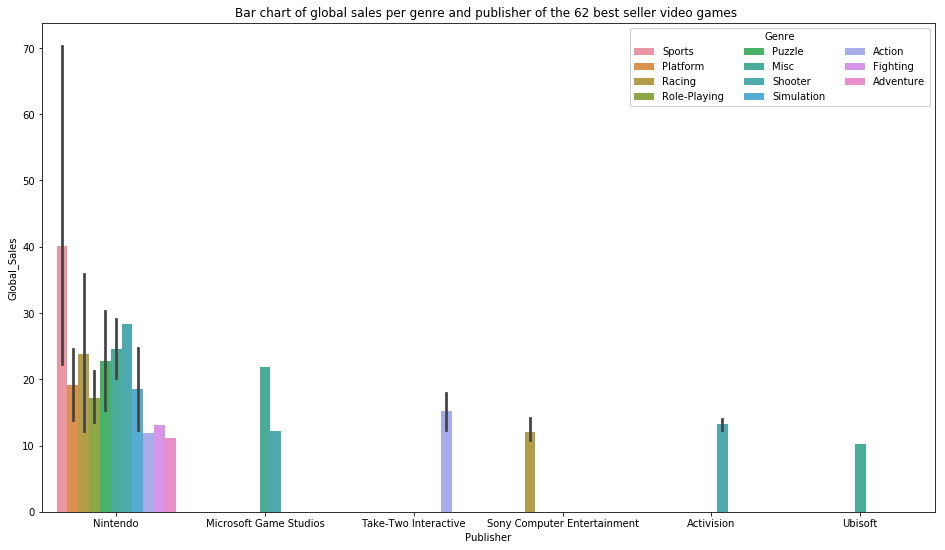

In [33]:
plt.figure(figsize=[16, 9])#Setting plot size

ax = sb.barplot(data = games.loc[outliers_global_genre,:], x = 'Publisher', y = 'Global_Sales', hue = 'Genre')
ax.legend(loc = 1, ncol = 3, framealpha = 1, title = 'Genre');#Position of Genre legend box
plt.title('Bar chart of global sales per genre and publisher of the 62 best seller video games ');

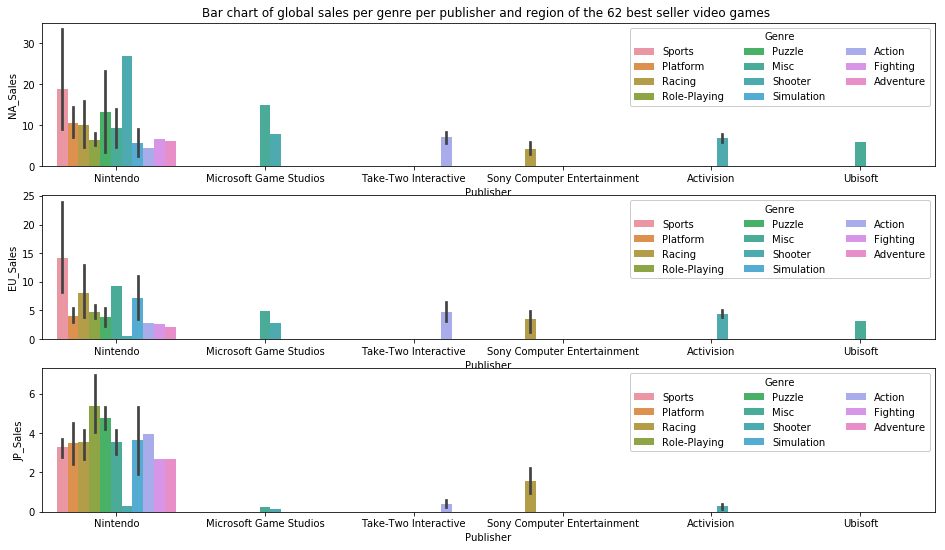

In [34]:
plt.figure(figsize=[16, 9])
plt.subplot(3, 1, 1)#Setting the plot position
ax = sb.barplot(data = games.loc[outliers_global_genre,:], x = 'Publisher', y = 'NA_Sales', hue = 'Genre')
ax.legend(loc = 1, ncol = 3, framealpha = 1, title = 'Genre');
plt.title('Bar chart of global sales per genre per publisher and region of the 62 best seller video games ');
plt.subplot(3, 1, 2)#Setting the plot position
ax = sb.barplot(data = games.loc[outliers_global_genre,:], x = 'Publisher', y = 'EU_Sales', hue = 'Genre')
ax.legend(loc = 1, ncol = 3, framealpha = 1, title = 'Genre');
plt.subplot(3, 1, 3)#Setting the plot position
ax = sb.barplot(data = games.loc[outliers_global_genre,:], x = 'Publisher', y = 'JP_Sales', hue = 'Genre')
ax.legend(loc = 1, ncol = 3, framealpha = 1, title = 'Genre');


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Here we can see tha the region effects wether the Genre and Sales can change, but on this obsarvation, the Publusher are the same on both regions. 

### Were there any interesting or surprising interactions between features?

> As expected, NA and JP have a significant difference between each other. That's a interest point, as it is not only NA, but EU also is different of JP and equal to NA. 

## Conclusions
> First finding was that DS and PS2 are the most popular plataform

> In second place we could see that 2009 in particular were the year with more release, and the 2000's were the decade with more sales of all. 

> Than we saw that Action were the genre more popular off all times and all that it represents almost 20% comparing with other genres. The second place was Sports that have almost 15%. 

> After that we saw the 25th more frequent publisher on the data set, and Electronic Arts were the more popular with more than 1300 games, followed by Activision, Namco, Ubisoft, Koname, THO than Nintendo (with almost 700 games) and it goes. 

> the next step was to take a look on the sales data, form the three regions, NA, EU, JP together. At first the aspects that it was possible to sse were, we had some outliers and the bigger part of the data was near to a low sale. That's was the reason for a scale transformation and it was used a log scale to obeserve better the distibution of sales. It turns out that the most part of the data set presente video games with low sales, what should be expected, another point was how the distribution is of the other games that have more sales.

> Trying to observe only the outliers on sales, we had filtered the data set and plot to see how it goes. At first no change on the scale were made, and the analysis results are that it was not too different from the previus analysis with all data set. Then we used a log scale to confirm that, and that's were we could see almost a binomial distribution on the regions. 

> With the purpose to find a better visualization of this corelaction, a histogram was plot, but now good understanding was made. 

> Then  it was used a heatmap, and with this plot it was possible to see by number which region have more corelaction with the global sales. But trying to see some trending lines, it was plot a visualizing with regression models.

> Then it was time to plot genre x global sales. and the result was not the most popular genre but the second one, sport were the best seller while action weer on 9th position.

> After that analyses, we filtered the data set to observer better how the best sellers in general distribuite. We saw that the best selleer games is a outlier, but if it did not exist, sport would still be the genre more sold on a global scale.]]

> Going to the end, comparing not just the genre and sales, we looked also to the publisher. And as turned out, Actvision were not the best seller, instead of Actvision, Nintendo got the first place on a global scale. 

> As expected, we did split the plot on the regions to see if the analyses were the same for genre and publisher, and as we could see Nintendo got the first place on all regions observed, but sports only took place on NA and EU, letting JP with Role Playing being the best seller genre.